# [Medidas de Assimetria em Estatística](https://en.wikipedia.org/wiki/Skewness) com Python
<div style="text-align: right">Versão 2023-05-04</div>

- Author: [André Lage Freitas](https://linkedin.com/in/lage)
  - Associate Professor at Universidade Federal de Alagoas (UFAL)
  - PhD in Computer Science from the _Institut National des Sciences Appliquées de Rennes_ (France)


## 1. Introdução às medidas de assimetria

### Conceito de assimetria e sua importância na análise de dados

Assimetria é uma medida que **descreve a forma de uma distribuição**, indicando se ela apresenta uma **inclinação para a direita ou esquerda**. Analisar a assimetria é crucial na análise de dados, pois ela permite identificar características importantes do conjunto de dados, como a direção e o grau de concentração dos valores. Além disso, a assimetria pode auxiliar na identificação de possíveis problemas nos dados, como outliers ou erros de amostragem.

In [83]:
import numpy as np
from scipy.stats import skew

# criando um conjunto de dados
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
assimetria = skew(data) # f(x) = y

print("Assimetria:", assimetria)

Assimetria: 0.0


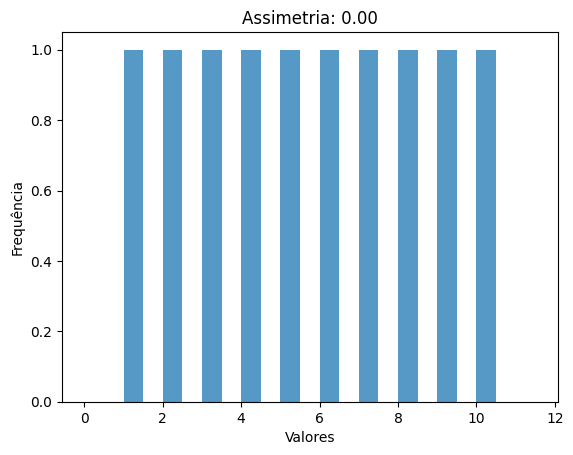

In [89]:
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
assimetria = skew(data)

plt.hist(data, bins=np.arange(0, 12, .5), alpha=0.75)
plt.title(f'Assimetria: {assimetria:.2f}')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()


### Assimetria à esquerda (negativa) e assimetria à direita (positiva)

A assimetria é classificada como **negativa (ou à esquerda) quando a cauda esquerda da distribuição é mais longa e apresenta mais valores extremos**. Nesse caso, a maioria dos valores está concentrada no lado direito da distribuição. Já a assimetria é classificada como positiva (ou à direita) quando a cauda direita da distribuição é mais longa e apresenta mais valores extremos. Isso significa que a maioria dos valores está concentrada no lado esquerdo da distribuição.

Tomemos como exemplo dois conjuntos de dados assimétricos. O conjunto `data_negativa` tem mais dados concentrados no valor `10`. Já o conjunto `data_positiva` tem mais dados concentrados no valor `1`.

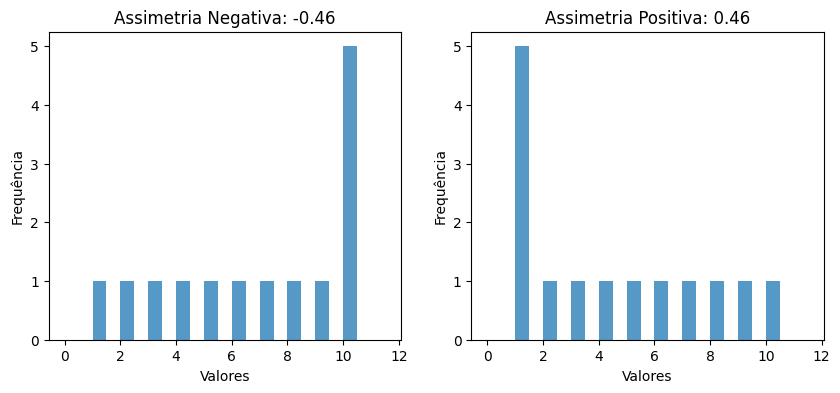

In [103]:
# Dados com assimetria negativa
data_negativa = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 10])
assimetria_negativa = skew(data_negativa)

# Dados com assimetria positiva
data_positiva = np.array([1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
assimetria_positiva = skew(data_positiva)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(data_negativa, bins=np.arange(0, 12, .5), alpha=0.75)
ax1.set_title(f'Assimetria Negativa: {assimetria_negativa:.2f}')
ax1.set_xlabel('Valores')
ax1.set_ylabel('Frequência')

ax2.hist(data_positiva, bins=np.arange(0, 12, .5), alpha=0.75)
ax2.set_title(f'Assimetria Positiva: {assimetria_positiva:.2f}')
ax2.set_xlabel('Valores')
ax2.set_ylabel('Frequência')

plt.show()


### Relação entre assimetria e distribuições unimodais

A assimetria está relacionada às distribuições unimodais, ou seja, **distribuições que possuem apenas um pico**. Em uma distribuição simétrica e unimodal, como a distribuição normal, a assimetria é zero, indicando que os dados estão igualmente distribuídos em ambos os lados da média. No entanto, uma distribuição unimodal pode ser assimétrica, com a assimetria positiva ou negativa, dependendo da forma da distribuição. 

São **utilidades da assimetria em uma distribuição unimodal**:

1. identificar se a média, a mediana e a moda estão próximas ou distantes entre si;
1. entender como os dados estão concentrados em torno da média;
1. compreender melhor o comportamento dos dados e a tomar decisões informadas com base em suas características.

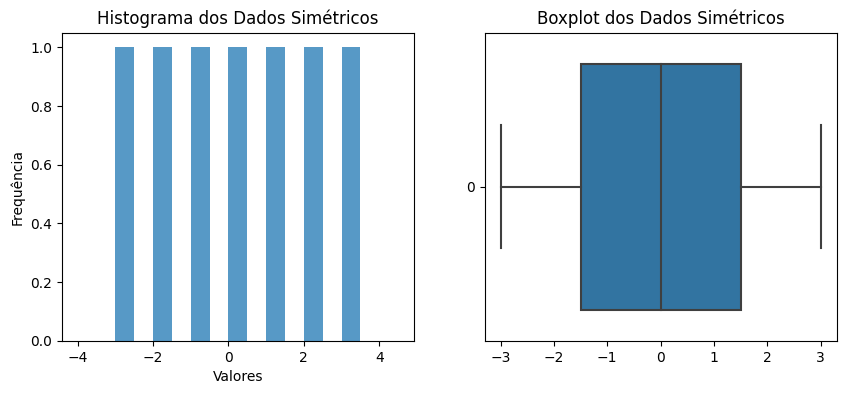

Estatísticas de resumo dos Dados Simétricos:
count    1000.000000
mean        1.248885
std         0.666429
min         0.024891
25%         0.751309
50%         1.170203
75%         1.684915
max         4.357916
dtype: float64


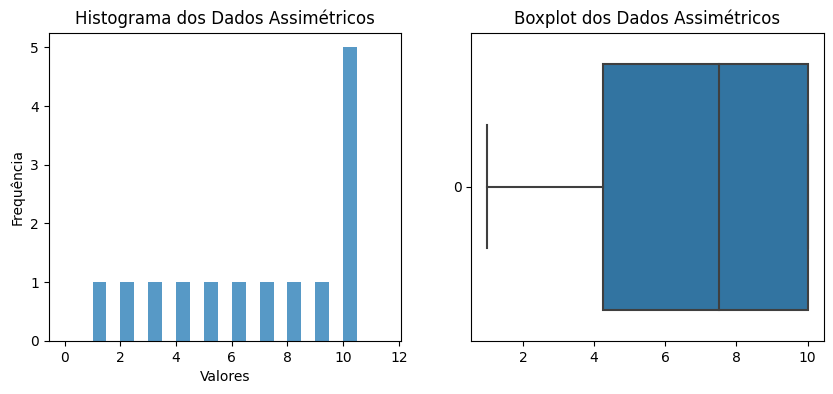

Estatísticas de resumo dos Dados Assimétricos:
Média: 6.79
Mediana: 7.50
Desvio Padrão: 3.17


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados simétricos
data_simetrica = np.array([-3, -2, -1, 0, 1, 2, 3])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(data_simetrica, bins=np.arange(-4, 5, .5), alpha=0.75, label="Simétrico")
ax1.set_xlabel('Valores')
ax1.set_ylabel('Frequência')
ax1.set_title('Histograma dos Dados Simétricos')

sns.boxplot(data=data_simetrica, ax=ax2, orient='h')
ax2.set_title('Boxplot dos Dados Simétricos')

plt.show()

print(f'Estatísticas de resumo dos Dados Simétricos:')
print(pd.Series(data).describe())

# Dados assimétricos
data_negativa = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 10])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(data_negativa, bins=np.arange(0, 12, .5), alpha=0.75, label="Assimétrico")
ax1.set_xlabel('Valores')
ax1.set_ylabel('Frequência')
ax1.set_title('Histograma dos Dados Assimétricos')

sns.boxplot(data=data_negativa, ax=ax2, orient='h')
ax2.set_title('Boxplot dos Dados Assimétricos')

plt.show()

print(f'Estatísticas de resumo dos Dados Assimétricos:')
print(f'Média: {np.mean(data_negativa):.2f}')
print(f'Mediana: {np.median(data_negativa):.2f}')
print(f'Desvio Padrão: {np.std(data_negativa):.2f}')


## 2. Coeficiente de assimetria de Pearson

### Definição

O Coeficiente de Assimetria de Pearson, também conhecido como terceiro momento padronizado, é uma medida estatística que quantifica a assimetria da distribuição de uma variável. O coeficiente ajuda a entender se a distribuição possui uma cauda mais pesada à direita (assimetria positiva) ou à esquerda (assimetria negativa).


### Interpretação dos valores do coeficiente

A interpretação do coeficiente de assimetria de Pearson é baseada nos valores obtidos:

- Se o coeficiente é **próximo de 0**, a distribuição é aproximadamente **simétrica**.
- Se o coeficiente é **maior que 0**, a distribuição tem uma assimetria **positiva (cauda direita mais pesada).**
- Se o coeficiente é **menor que 0**, a distribuição tem uma assimetria **negativa (cauda esquerda mais pesada).**


### Exemplo prático em Python utilizando a [biblioteca `scipy.stats`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html)

A biblioteca `scipy.stats` fornece uma função chamada `skew` que permite calcular o coeficiente de assimetria de Pearson para um conjunto de dados. 

No exemplo a seguir, o código calculará e exibirá o coeficiente de assimetria de Pearson para os conjuntos de dados fornecido.


In [99]:
import numpy as np
from scipy.stats import skew

# Dados simétricos
data_simetrica = np.array([-3, -2, -1, 0, 1, 2, 3])
assimetria_simetrica = skew(data_simetrica)

# Dados com assimetria negativa
data_negativa = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 10])
assimetria_negativa = skew(data_negativa)

# Dados com assimetria positiva
data_positiva = np.array([1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
assimetria_positiva = skew(data_positiva)

print("Coeficiente de Assimetria de Fisher-Pearson para Dados Simétricos:", assimetria_simetrica)
print("Coeficiente de Assimetria de Fisher-Pearson para Dados com Assimetria Negativa:", assimetria_negativa)
print("Coeficiente de Assimetria de Fisher-Pearson para Dados com Assimetria Positiva:", assimetria_positiva)


Coeficiente de Assimetria de Fisher-Pearson para Dados Simétricos: 0.0
Coeficiente de Assimetria de Fisher-Pearson para Dados com Assimetria Negativa: -0.4649552877657795
Coeficiente de Assimetria de Fisher-Pearson para Dados com Assimetria Positiva: 0.46495528776577927


## 3. Coeficiente de assimetria de Fisher

### Definição

O Coeficiente de Assimetria de Fisher, também conhecido como coeficiente de assimetria ajustado, é outra medida estatística para quantificar a assimetria da distribuição de uma variável. Diferente do coeficiente de Pearson, **o coeficiente de Fisher tem a vantagem de ser menos sensível a outliers**. 


### Interpretação dos valores do coeficiente

A interpretação do coeficiente de assimetria de Fisher é semelhante à do coeficiente de Pearson:

- Se o coeficiente é **próximo de 0**, a distribuição é aproximadamente simétrica.
- Se o coeficiente é **maior que 0**, a distribuição tem uma assimetria positiva (cauda direita mais pesada).
- Se o coeficiente é **menor que 0**, a distribuição tem uma assimetria negativa (cauda esquerda mais pesada).


### Exemplo prático em Python



In [107]:
import numpy as np

def fisher_skew(data):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data)
    skewness = np.sum((data - mean)**3) / (n * std_dev**3)
    fisher_skewness = skewness * (n / ((n - 1) * (n - 2)))
    return fisher_skewness

# Dados simétricos
data_simetrica = np.array([-3, -2, -1, 0, 1, 2, 3])
assimetria_fisher = fisher_skew(data_simetrica)
print("Coeficiente de Assimetria de Fisher (Simétrica):", assimetria_fisher)

# Dados com assimetria negativa
data_negativa = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 10])
assimetria_fisher = fisher_skew(data_negativa)
print("Coeficiente de Assimetria de Fisher (Negativa):", assimetria_fisher)

# Dados com assimetria positiva
data_positiva = np.array([1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
assimetria_fisher = fisher_skew(data_positiva)
print("Coeficiente de Assimetria de Fisher (Positiva):", assimetria_fisher)



Coeficiente de Assimetria de Fisher (Simétrica): 0.0
Coeficiente de Assimetria de Fisher (Negativa): -0.04172675659436482
Coeficiente de Assimetria de Fisher (Positiva): 0.041726756594364804


## 4. Comparação entre Coeficientes de assimetria: Pearson e Fisher

### Diferenças e semelhanças entre os coeficientes

Ambos os coeficientes, Pearson e Fisher, são utilizados para medir a assimetria de uma distribuição. Eles compartilham a mesma interpretação em termos de valores próximos a 0 indicarem simetria, valores maiores que 0 indicarem assimetria positiva e valores menores que 0 indicarem assimetria negativa. 

Entretanto, existem algumas diferenças entre os dois coeficientes:

- O **coeficiente de Fisher é uma versão ajustada do coeficiente de Pearson que leva em consideração o tamanho da amostra**.
- **O coeficiente de Fisher é menos sensível a outliers** em comparação com o coeficiente de Pearson, o que o torna **mais adequado para análises de distribuições com presença de valores extremos**.


### Escolha do coeficiente adequado para diferentes conjuntos de dados

Ao analisar conjuntos de dados, a escolha entre os coeficientes de assimetria de Pearson e Fisher depende das características específicas dos dados e do objetivo da análise:

1. Se os dados forem provenientes de **uma amostra grande e com pouca presença de outliers, o coeficiente de Pearson** pode ser uma boa escolha.
2. **Se os dados possuírem muitos outliers ou a amostra for pequena**, o **coeficiente de Fisher** pode ser mais apropriado, pois é menos sensível a valores extremos e leva em consideração o tamanho da amostra.

**Observação sobre o desvio padrão**. O desvio padrão é uma medida de dispersão que indica o grau de variação ou dispersão dos dados em torno da média. Um desvio padrão grande ou pequeno pode ser interpretado em relação ao contexto dos dados.

- Desvio padrão grande: Quando o desvio padrão é grande, isso indica que os dados estão mais dispersos ou espalhados em torno da média. Em outras palavras, há uma variação maior nos dados. Isso pode ser um sinal de que há uma diversidade maior nos valores ou a presença de outliers (valores extremos) que estão afetando a dispersão dos dados.

- Desvio padrão pequeno: Quando o desvio padrão é pequeno, isso indica que os dados estão menos dispersos ou mais agrupados em torno da média. Há uma variação menor nos dados, e os valores tendem a ser mais consistentes e próximos da média.

É importante levar em consideração o contexto dos dados ao interpretar o desvio padrão. Um desvio padrão grande ou pequeno pode ser relevante ou irrelevante, dependendo da situação e dos objetivos da análise. Além disso, o desvio padrão deve ser interpretado em relação à escala dos dados, pois um desvio padrão "grande" ou "pequeno" em termos absolutos pode não ser significativo em relação à escala dos valores dos dados.

No exemplos a seguir, os conjuntos de dados A e B têm o desvio padrão grande, já os C e D têm o desvio padrão pequeno.


========== Estatísticas de resumo do conjunto de dados A ==========

count     7.000000
mean     25.285714
std      24.397502
min       2.000000
25%       8.500000
50%      18.000000
75%      35.000000
max      70.000000
dtype: float64


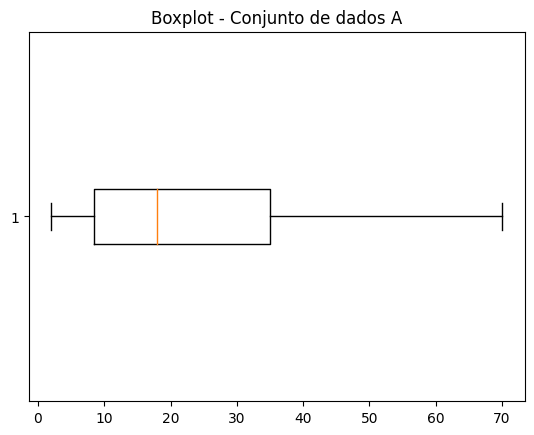

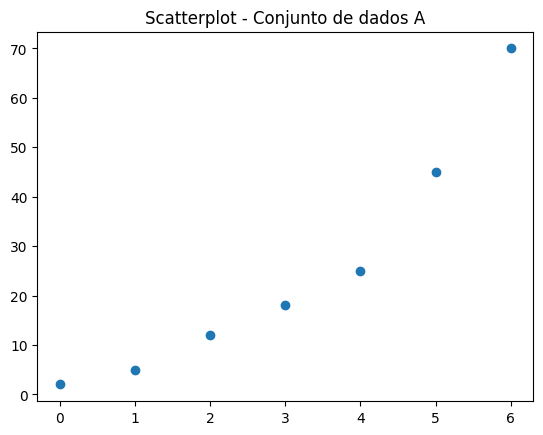


========== Estatísticas de resumo do conjunto de dados B ==========

count      9.000000
mean      37.111111
std       31.884340
min        5.000000
25%       15.000000
50%       25.000000
75%       50.000000
max      100.000000
dtype: float64


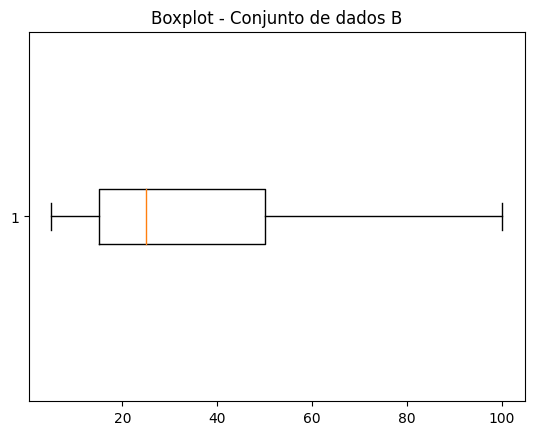

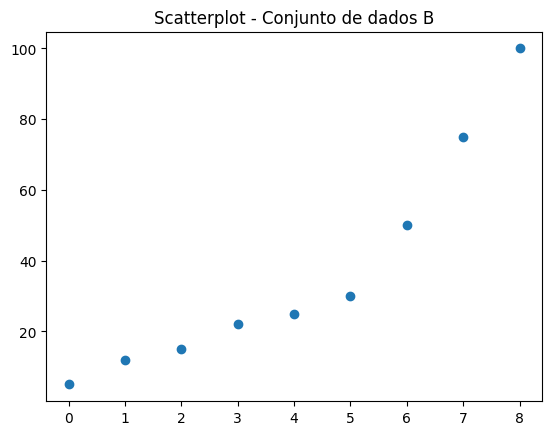


========== Estatísticas de resumo do conjunto de dados C ==========

count     8.000000
mean     10.250000
std       1.035098
min       9.000000
25%       9.750000
50%      10.000000
75%      11.000000
max      12.000000
dtype: float64


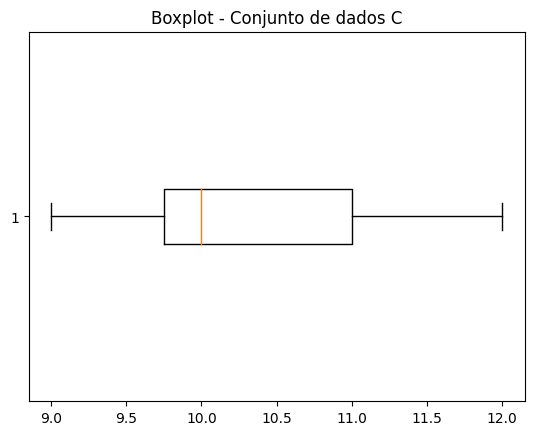

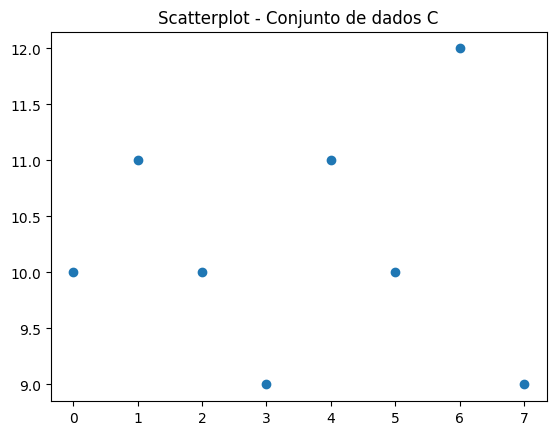


========== Estatísticas de resumo do conjunto de dados D ==========

count     7.000000
mean     30.857143
std       1.345185
min      29.000000
25%      30.000000
50%      31.000000
75%      31.500000
max      33.000000
dtype: float64


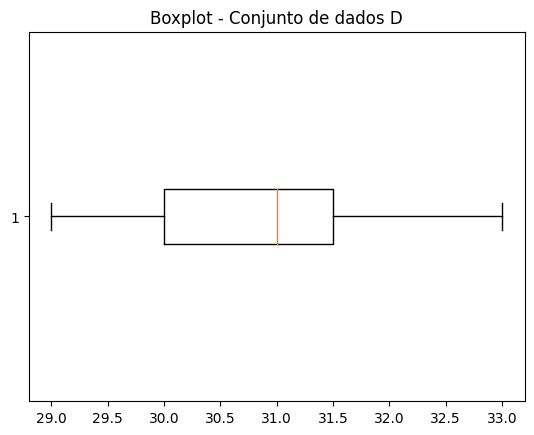

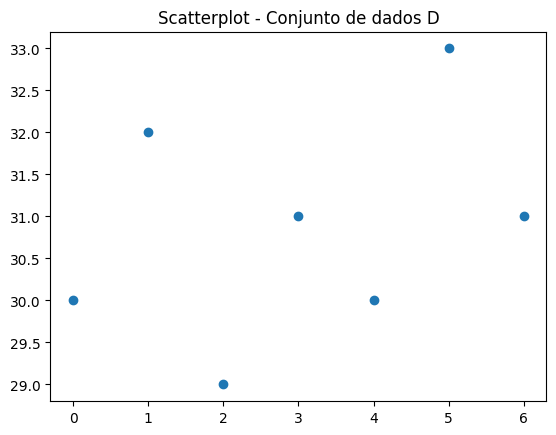

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_A = np.array([2, 5, 12, 18, 25, 45, 70])
data_B = np.array([5, 12, 15, 22, 25, 30, 50, 75, 100])
data_C = np.array([10, 11, 10, 9, 11, 10, 12, 9])
data_D = np.array([30, 32, 29, 31, 30, 33, 31])

datasets = {
    "A": data_A,
    "B": data_B,
    "C": data_C,
    "D": data_D
}

for name, data in datasets.items():
    print(f"\n========== Estatísticas de resumo do conjunto de dados {name} ==========\n")
    print(pd.Series(data).describe())
    
    # Adicionando boxplots
    plt.figure()
    plt.boxplot(data, vert=False)
    plt.title(f"Boxplot - Conjunto de dados {name}")
    plt.show()
    
    # Adicionando scatterplots
    plt.figure()
    plt.scatter(range(len(data)), data)
    plt.title(f"Scatterplot - Conjunto de dados {name}")
    plt.show()


## 5. Exercício

1. Dentre os coeficientes de Pearson e de Fisher, escolha o coeficiente mais adequado para analizar a assimetria de cada distribuição nos conjuntos de dados do exemplo a seguir.
1. Indique qual é a assimetria encontrada para cada exemplo.


============ Analisando o conjunto de dados: Simétrica ==============

count    10000.000000
mean        -0.002136
std          1.003462
min         -3.922400
25%         -0.672591
50%         -0.002595
75%          0.671081
max          3.926238
dtype: float64

Coeficiente de Assimetria de Pearson: 0.0019636978
Coeficiente de Assimetria de Fisher: 0.0000001964



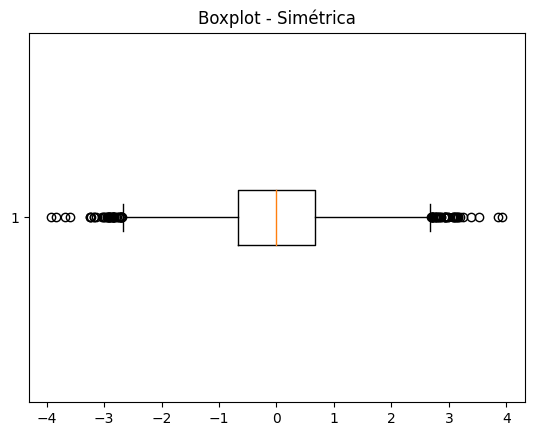

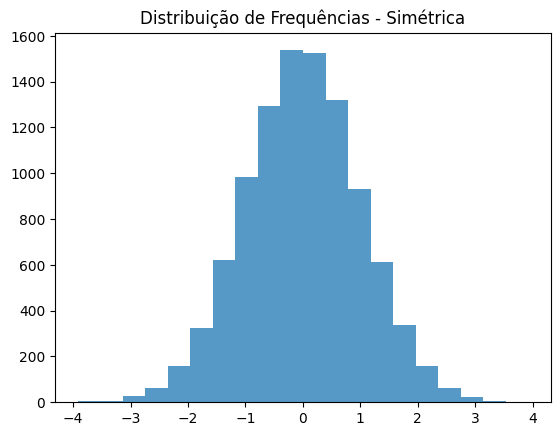


============ Analisando o conjunto de dados: Assimetria Positiva GAMMA ==============

count    10000.000000
mean         1.026734
std          1.025267
min          0.000048
25%          0.297789
50%          0.715944
75%          1.415523
max          9.495716
dtype: float64

Coeficiente de Assimetria de Pearson: 1.9974104362
Coeficiente de Assimetria de Fisher: 0.0001998010



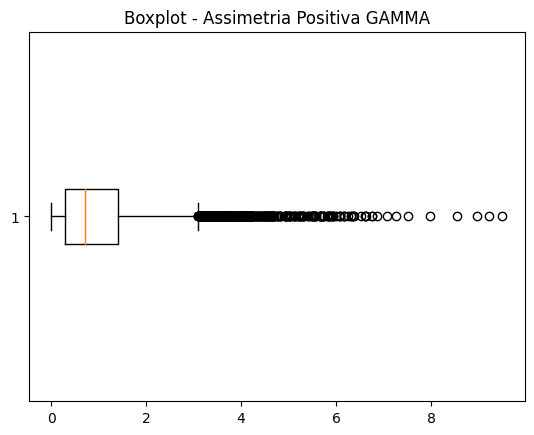

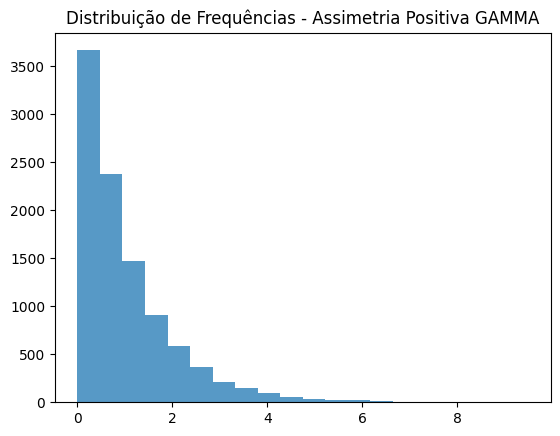


============ Analisando o conjunto de dados: Assimetria EXPONENTIAL ==============

count    10000.000000
mean        -1.013211
std          0.989861
min         -1.999933
25%         -1.714950
50%         -1.313402
75%         -0.647437
max          6.224838
dtype: float64

Coeficiente de Assimetria de Pearson: 2.0040361163
Coeficiente de Assimetria de Fisher: 0.0002004637



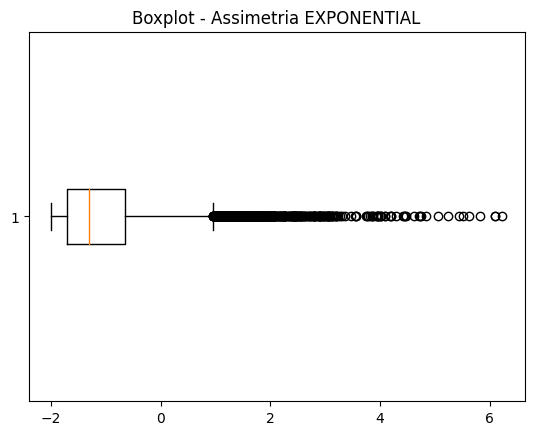

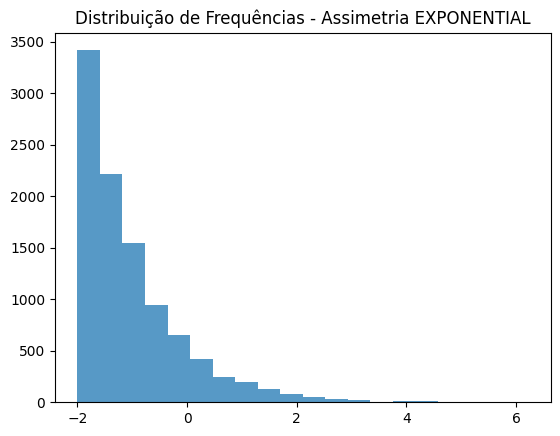


============ Analisando o conjunto de dados: Beta ==============

count    10000.000000
mean         0.716155
std          0.159385
min          0.093978
25%          0.613166
50%          0.738952
75%          0.840592
max          0.996275
dtype: float64

Coeficiente de Assimetria de Pearson: -0.6038668851
Coeficiente de Assimetria de Fisher: -0.0000604048



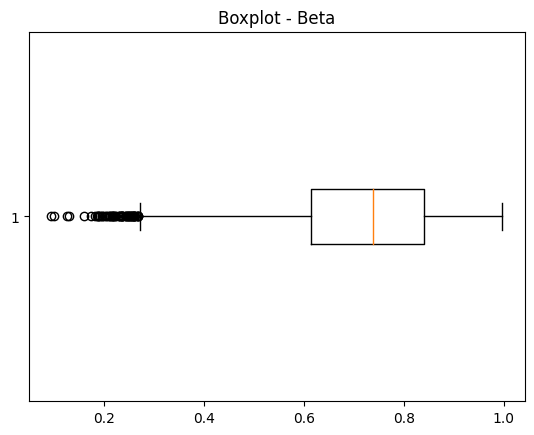

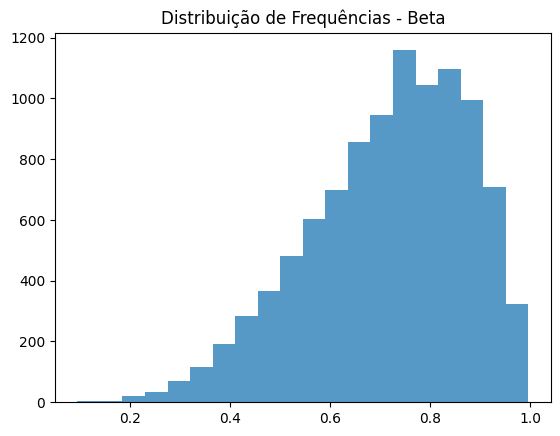


============ Analisando o conjunto de dados: Poisson ==============

count    10000.000000
mean         2.980400
std          1.719567
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         14.000000
dtype: float64

Coeficiente de Assimetria de Pearson: 0.5876371548
Coeficiente de Assimetria de Fisher: 0.0000587813



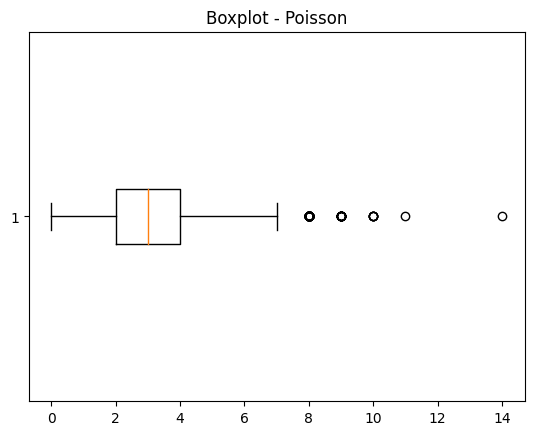

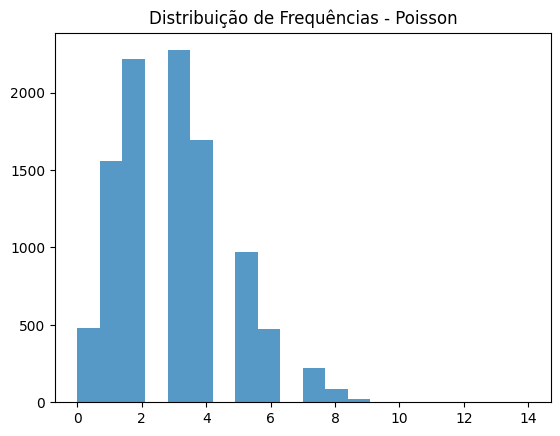


============ Analisando o conjunto de dados: Logística ==============

count    10000.000000
mean        -0.052017
std          1.811404
min         -9.774313
25%         -1.133134
50%         -0.044607
75%          1.039053
max          9.449823
dtype: float64

Coeficiente de Assimetria de Pearson: -0.0375053827
Coeficiente de Assimetria de Fisher: -0.0000037517



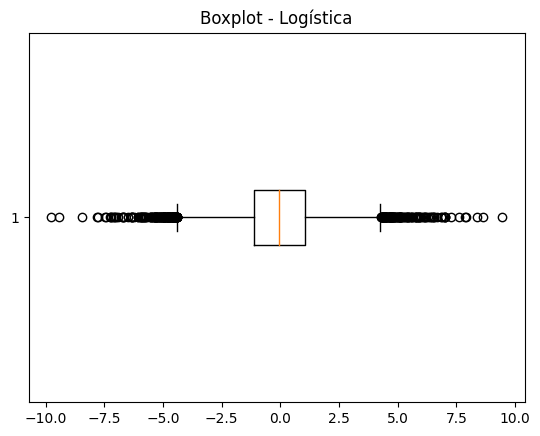

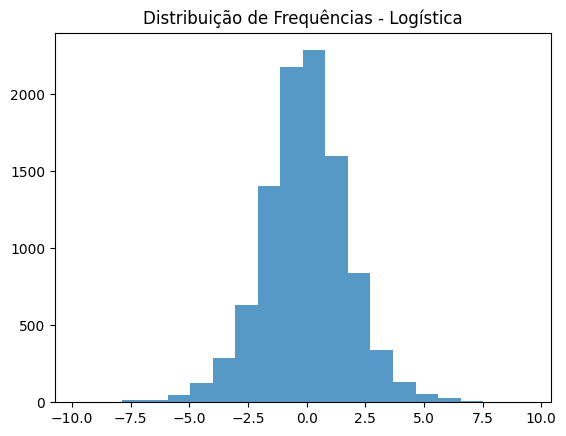


============ Analisando o conjunto de dados: Weibull ==============

count    10000.000000
mean         0.913804
std          0.620029
min          0.002130
25%          0.441400
50%          0.791192
75%          1.257565
max          4.413860
dtype: float64

Coeficiente de Assimetria de Pearson: 1.0490512908
Coeficiente de Assimetria de Fisher: 0.0001049366



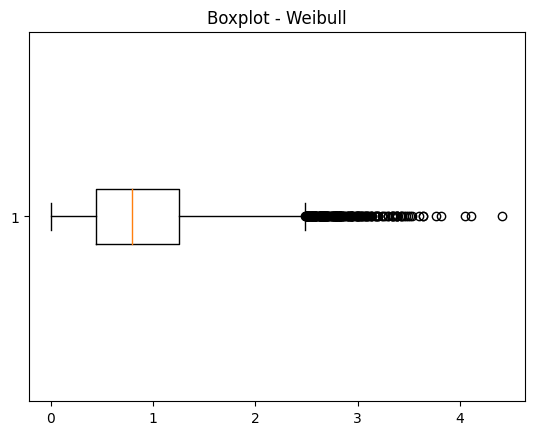

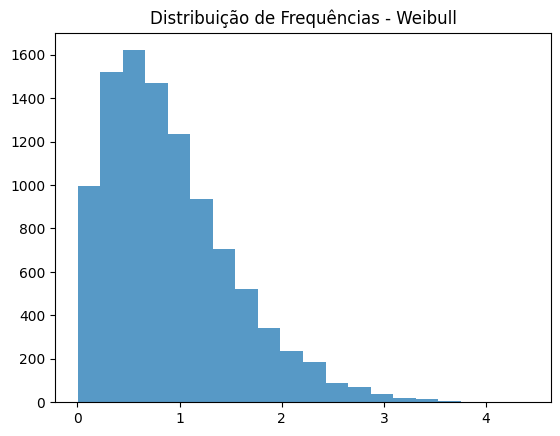


============ Analisando o conjunto de dados: Rayleigh ==============

count    10000.000000
mean         1.271356
std          0.664234
min          0.005616
25%          0.770923
50%          1.192587
75%          1.686224
max          4.786069
dtype: float64

Coeficiente de Assimetria de Pearson: 0.6580202085
Coeficiente de Assimetria de Fisher: 0.0000658218



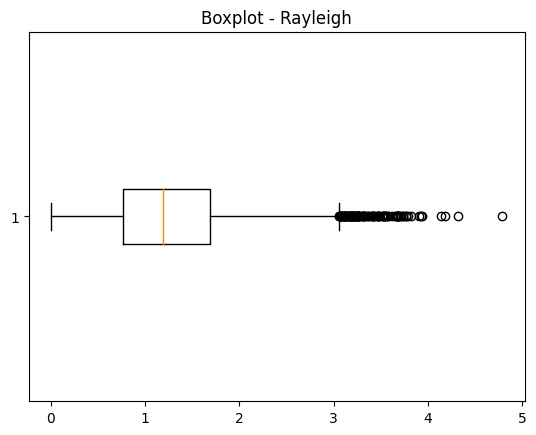

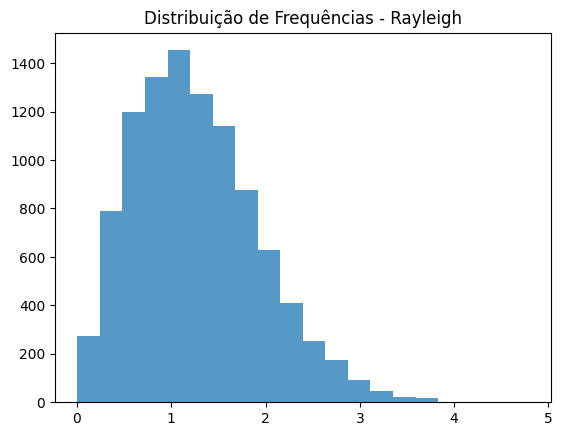

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, beta, poisson, logistic
import pandas as pd

# Função para calcular a assimetria de Fisher
def fisher_skew(data):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data)
    skewness = np.sum( (data - mean)**3 ) / (n * std_dev**3)
#     print(skewness)
    fisher_skewness = skewness * (n / ((n - 1) * (n - 2)))
#     print(fisher_skewness)
    return fisher_skewness

# Gerando conjuntos de dados com diferentes distribuições
np.random.seed(42)  # Fixa a semente aleatória para reproduzibilidade

# tamanho dos conjuntos de dados, isto é, o n. de observações
sample_size=10000

# gerando 7 conjuntos de dados com números aleatórios com diferentes distribuições
data_simetrica = np.random.normal(loc=0, scale=1, size=sample_size)
data_assimetria_positiva = np.random.gamma(shape=1, scale=1, size=sample_size)
data_assimetria_exp = np.random.exponential(scale=1, size=sample_size) - 2
data_beta = np.random.beta(a=5, b=2, size=sample_size)
data_poisson = np.random.poisson(lam=3, size=sample_size)
data_logistica = np.random.logistic(loc=0, scale=1, size=sample_size)
data_weibull = np.random.weibull(a=1.5, size=sample_size)
data_rayleigh = np.random.rayleigh(scale=1, size=sample_size)

datasets = {
    "Simétrica": data_simetrica,
    "Assimetria Positiva GAMMA": data_assimetria_positiva,
    "Assimetria EXPONENTIAL": data_assimetria_exp,
    "Beta": data_beta,
    "Poisson": data_poisson,
    "Logística": data_logistica,
    "Weibull": data_weibull,
    "Rayleigh": data_rayleigh,
}

# Analisando cada conjunto de dados
for name, data in datasets.items():
    print(f"\n============ Analisando o conjunto de dados: {name} ==============\n")

    print(pd.Series(data).describe())
    # Calculando coeficientes de assimetria
    pearson_coeff = skew(data)
    fisher_coeff = fisher_skew(data)
    # Imprimindo coeficientes de assimetria
    print(f"\nCoeficiente de Assimetria de Pearson: {pearson_coeff:.10f}")
    print(f"Coeficiente de Assimetria de Fisher: {fisher_coeff:.10f}\n")
    
    # Boxplot
    plt.boxplot(data, vert=False)
    plt.title(f"Boxplot - {name}")
    plt.show()
    
    # Distribuição de frequências
    plt.hist(data, bins=20, alpha=0.75)
    plt.title(f"Distribuição de Frequências - {name}")
    plt.show()